<h1> Klasyfikacja

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
iris = datasets.load_iris()
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)

Text(0.5, 1.0, 'Accuracy of knn algorithm')

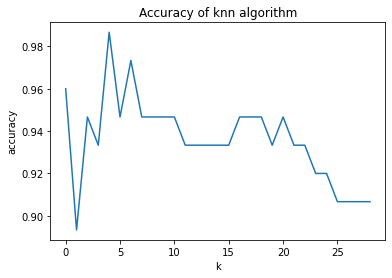

In [3]:
def select_most_common_class(knn):
    unique, counts = np.unique(knn, return_counts = True)
    return unique[np.argmax(counts)]

accuracy = []

for k in range(1, 30):
    predictions = []
    for elem in features_test:
        neighbours = np.zeros((features_train.shape[0], 2), dtype = float)
        neighbours[:,1] = labels_train

        for idx, samp in enumerate(features_train):
            neighbours[idx, 0] = distance.euclidean(elem, samp)

        neighbours = neighbours[np.argsort(neighbours[:,0])]
        knn = neighbours[0:k, 1]
        predictions.append(select_most_common_class(knn))    
    

    accuracy.append(accuracy_score(labels_test, predictions))

import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy of knn algorithm')

Pyhton - sklearn

In [4]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
accuracy = []
for k in range(1,30):
    classifier = KNeighborsClassifier(k)
    classifier.fit(features_train, labels_train)
    accuracy.append(classifier.score(features_test, labels_test))


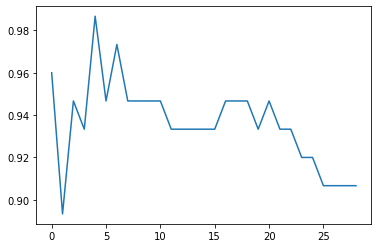

In [6]:
plt.plot(accuracy)

Decision tree

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [8]:
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [9]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")

True

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [14]:
data_mnist = loadmat('mnist.mat')

In [15]:
X = data_mnist["trainX"]
y = data_mnist["trainY"]

for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])

In [17]:
y = y.T
y.shape

(60000, 1)

In [18]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
w = 28
h = 28

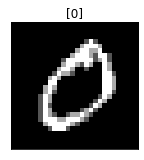

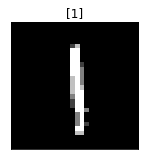

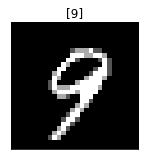

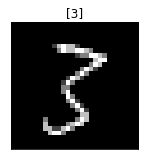

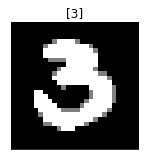

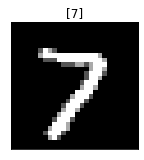

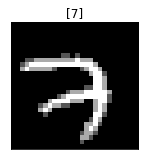

In [22]:
for i in [1, 8, 1167, 2564, 5967, 4000, 5000]:
    plot_mnist([X[i]], [y[i]], w, h, n_row=1, n_col=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([1, 4, 7, ..., 0, 5, 3], dtype=uint8)

In [26]:
f1_score(y_test, y_pred, average=None)

array([0.89597218, 0.93708364, 0.77417695, 0.77430456, 0.82007414,
       0.73346809, 0.87902265, 0.87215686, 0.74472391, 0.75647964])

In [27]:
confusion_matrix(y_test, y_pred)

array([[1546,    0,   36,   18,    9,   60,   23,    9,   28,    5],
       [   1, 1899,   38,   15,    7,   18,    6,   15,   19,    9],
       [  32,   29, 1505,   58,   33,   39,   41,   52,  109,   25],
       [  17,   13,   61, 1350,   20,  168,   10,   37,   58,   38],
       [  18,    4,   63,   14, 1438,   36,   23,   25,   32,  138],
       [  26,    5,   32,  121,   31, 1270,   30,   17,   58,   40],
       [  24,   10,   34,    4,   25,   76, 1475,    8,   40,    8],
       [   7,   18,   51,   20,   27,   16,    2, 1668,   19,   59],
       [  26,   37,   80,   64,   40,   82,   34,   20, 1288,   95],
       [  20,   11,   65,   51,   86,   68,    8,   87,   42, 1328]],
      dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1734
           1       0.94      0.94      0.94      2027
           2       0.77      0.78      0.77      1923
           3       0.79      0.76      0.77      1772
           4       0.84      0.80      0.82      1791
           5       0.69      0.78      0.73      1630
           6       0.89      0.87      0.88      1704
           7       0.86      0.88      0.87      1887
           8       0.76      0.73      0.74      1766
           9       0.76      0.75      0.76      1766

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000

